### **Importing the necessary libraries**

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### _Reading in the data_

In [149]:
train_data = pd.read_csv('train.csv', index_col='PassengerId')
test_data = pd.read_csv('test.csv', index_col='PassengerId')

### _Trying to understand the data_

In [150]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [151]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### _Visualiations_

<AxesSubplot:xlabel='Survived', ylabel='count'>

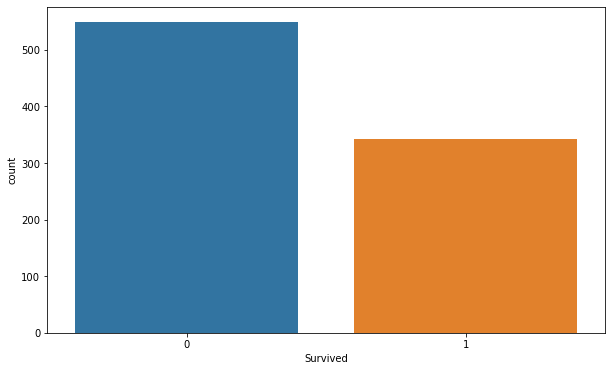

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_data)

from the above we can see that more died than survived in the incident

<AxesSubplot:xlabel='Survived', ylabel='count'>

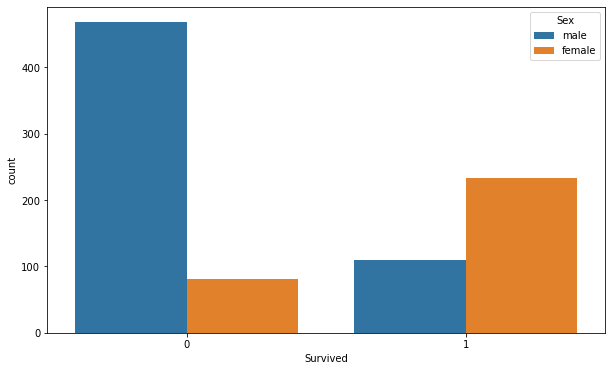

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=train_data)

from the above we see that more dudes died and more dudes didn't survived




<AxesSubplot:xlabel='Survived', ylabel='count'>

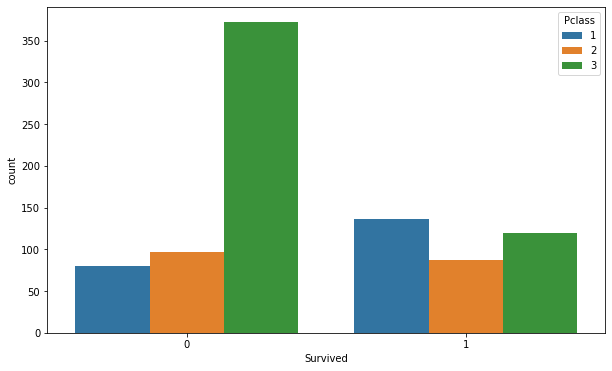

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_data)

we can see that more of the people that died are from the third class and more of the people that survived are from the 1st class even though they are a little more than those that survived in the 3rd class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

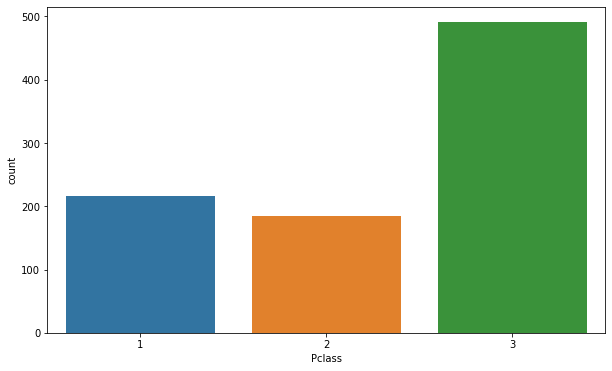

In [156]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_data)

we see that most of the people were in the 3rd class i think due to the fare price

<AxesSubplot:xlabel='Pclass', ylabel='count'>

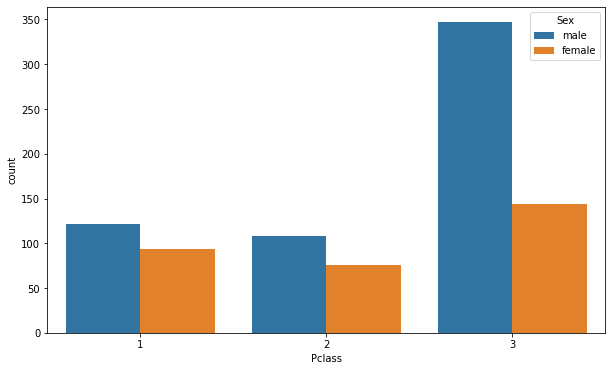

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=train_data)

more guys were in every class because more guys boarded the ship than ladies

<AxesSubplot:xlabel='Pclass', ylabel='count'>

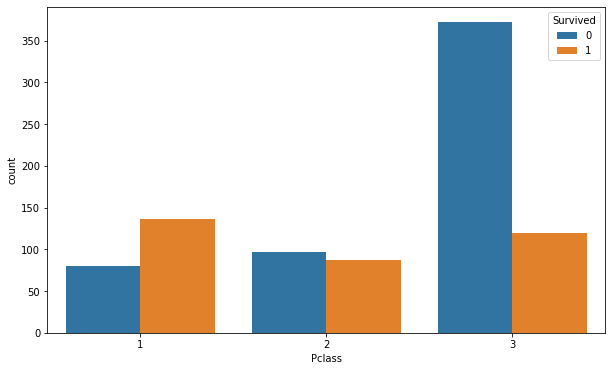

In [158]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

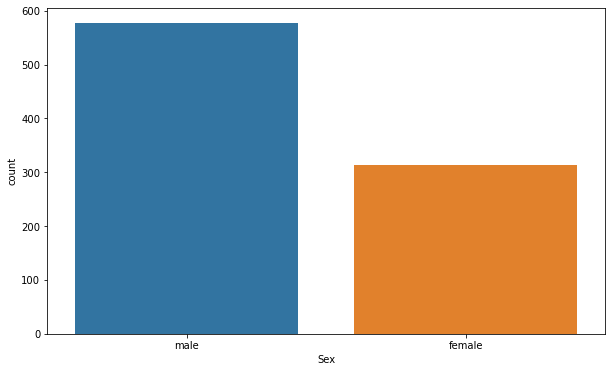

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

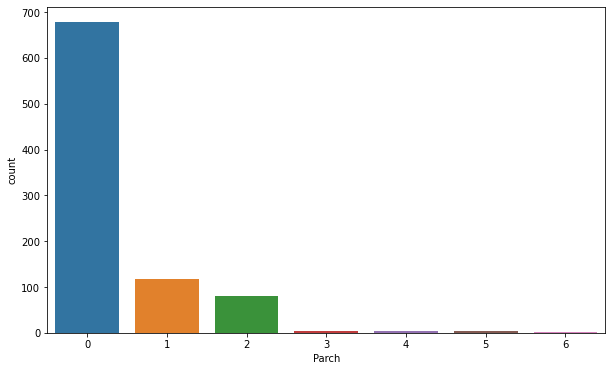

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=train_data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

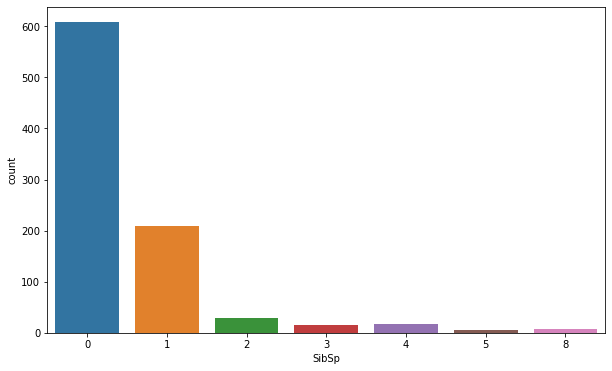

In [161]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=train_data)

<AxesSubplot:>

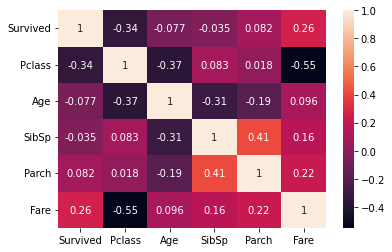

In [162]:
sns.heatmap(train_data.corr(), annot=True)

from the above we can see that Pclass is the most correlated with Age so we are going to use it as a means to fill in the missing values in our age column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

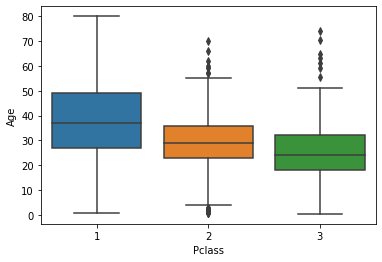

In [163]:
# plt.figure(figsize=(1, 6))
sns.boxplot(x="Pclass", y="Age", data=train_data)

In [164]:
def age_imputing(row):
    if pd.isnull(row.Age):
        if row.Pclass == 1:
            row.Age = 38
        elif row.Pclass == 2:
            row.Age = 30
        elif row.Pclass == 3:
            row.Age = 25
    return row

train_data = train_data.apply(age_imputing, axis='columns')
test_data = test_data.apply(age_imputing, axis='columns')

In [165]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [166]:
train_data.drop(columns=['Name', 'Cabin', "Ticket"], inplace=True)
test_data.drop(columns=['Name', 'Cabin', "Ticket"], inplace=True)

In [167]:
train_data["AgeCat"] = range(891)
test_data["AgeCat"] = range(418)

In [168]:
# i want to put the age ranges in a category sort of
def age_group(row):
    if row.Age >= (1 / 12) and row.Age <= (1):
        row.AgeCat = 'Infant'
    elif row.Age >= 13 and row.Age <= 17:
        row.AgeCat = 'Adolescent'
    elif row.Age >= 18 and row.Age <= 65:
        row.AgeCat = 'Adults'
    else:
        row.AgeCat = "Older Adults"
    return row

train_data = train_data.apply(age_group, axis='columns')
test_data = test_data.apply(age_group, axis='columns')


In [169]:
train_data['AgeCat'].value_counts()
test_data['AgeCat'].value_counts()


Adults          375
Older Adults     19
Adolescent       16
Infant            8
Name: AgeCat, dtype: int64

<AxesSubplot:xlabel='AgeCat', ylabel='count'>

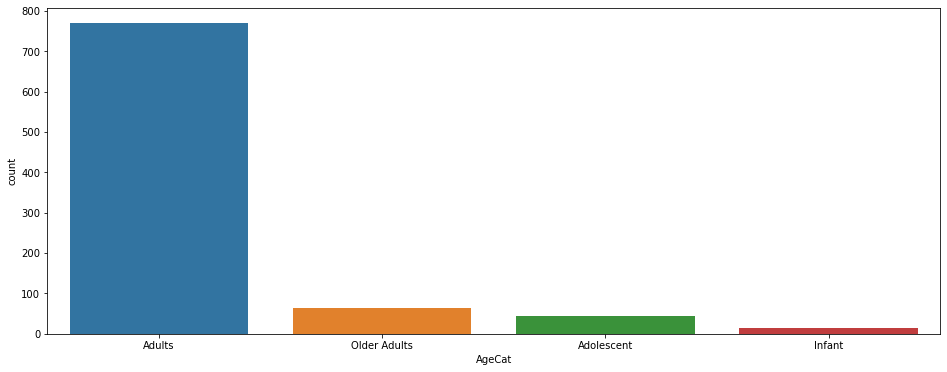

In [170]:
plt.figure(figsize=(16, 6))
sns.countplot(x='AgeCat', data = train_data)

from this we  can see that there were more adults than any other age categories

<AxesSubplot:xlabel='AgeCat', ylabel='count'>

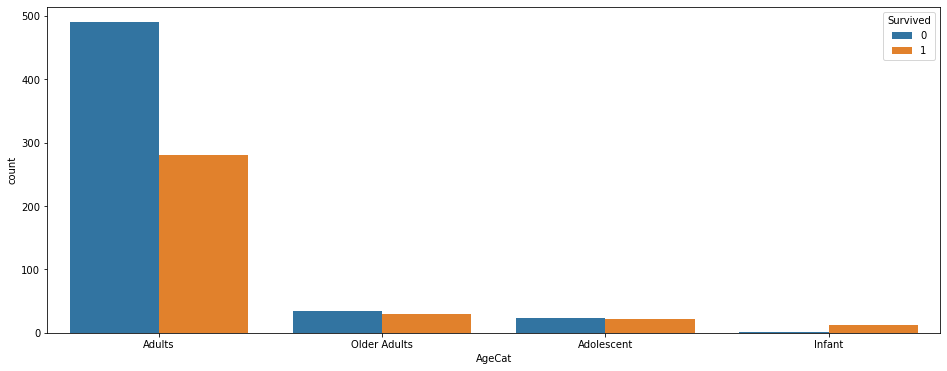

In [171]:
plt.figure(figsize=(16, 6))
sns.countplot(x='AgeCat', hue='Survived', data = train_data)

we can see that in all but the infants, more died than survived

### _Dealing with categorical variables_

In [172]:
train_data['Sex'] = train_data['Sex'].map({'female':1, 'male':0})
test_data['Sex'] = test_data['Sex'].map({'female':1, 'male':0})

In [173]:
train_data = pd.get_dummies(data=train_data, columns=['Pclass', 'Embarked', 'AgeCat'], drop_first=True)
test_data = pd.get_dummies(data=test_data, columns=['Pclass', 'Embarked', 'AgeCat'], drop_first=True)

In [174]:
train_data['FamSize'] = train_data['SibSp'] + train_data['Parch']
test_data['FamSize'] = test_data['SibSp'] + test_data['Parch']

In [175]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeCat_Adults,AgeCat_Infant,AgeCat_Older Adults,FamSize
PassengerId,,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,1,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,1
3,1,1,26.0,0,0,7.9250,0,1,0,1,1,0,0,0
4,1,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,1
5,0,0,35.0,0,0,8.0500,0,1,0,1,1,0,0,0


<AxesSubplot:>

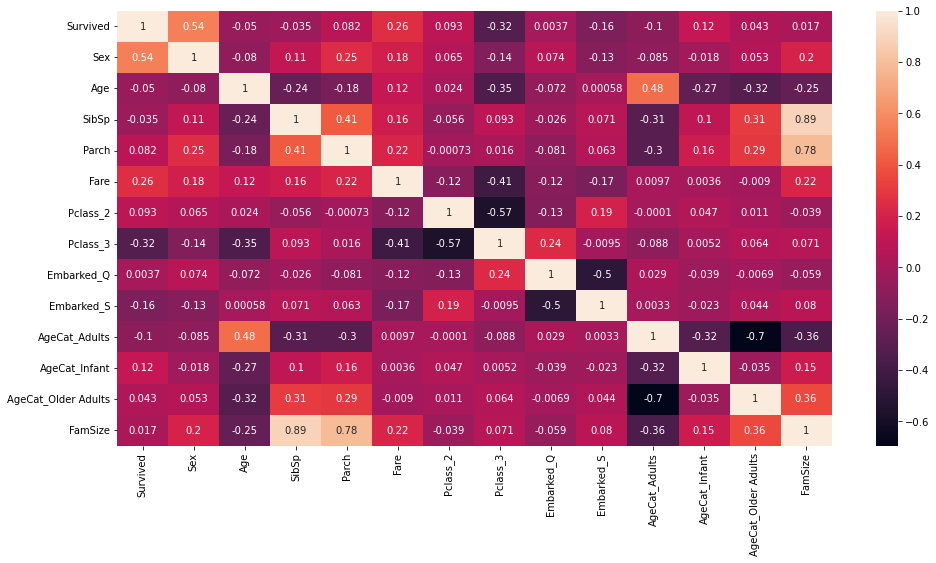

In [176]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True)

In [177]:
train_data.describe()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,AgeCat_Adults,AgeCat_Infant,AgeCat_Older Adults,FamSize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.352413,29.265062,0.523008,0.381594,32.204208,0.206510,0.551066,0.086420,0.722783,0.864198,0.015713,0.070707,0.904602
std,0.486592,0.477990,13.212184,1.102743,0.806057,49.693429,0.405028,0.497665,0.281141,0.447876,0.342771,0.124431,0.256479,1.613459
min,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,37.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [178]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

### __Machine Learning__

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [180]:
Xtrain = train_data.drop(columns='Survived')
ytrain= train_data['Survived']

In [181]:
Xtrain = Xtrain.drop(columns=['Parch'])
Xtest = test_data.drop(columns=['Parch'])

In [182]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

In [183]:
def run_experiment(model, Xtrain, Xtest, ytrain, ytest):
    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    print("Precision: %.3f"% (precision_score(ytest, pred) * 100))
    print("Recall: %.3f"% (recall_score(ytest, pred) * 100))
    print("F1: %.3f"% (f1_score(ytest, pred) * 100))
    print("Accuracy: %.3f"% (accuracy_score(ytest, pred) * 100))
    accuracy = confusion_matrix(ytest, pred)
    print(f"confusion matrix: {accuracy}")

In [184]:
model = LogisticRegression(max_iter=300)
run_experiment(model, Xtrain, Xtrain, ytrain, ytrain)
lr_pred = model.predict(Xtest)

Precision: 79.344
Recall: 70.760
F1: 74.807
Accuracy: 81.706
confusion matrix: [[486  63]
 [100 242]]


In [185]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
run_experiment(model2, Xtrain, Xtrain, ytrain, ytrain)
rnd_pred = model2.predict(Xtest)

Precision: 98.507
Recall: 96.491
F1: 97.489
Accuracy: 98.092
confusion matrix: [[544   5]
 [ 12 330]]


In [186]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
run_experiment(model3, Xtrain, Xtrain, ytrain, ytrain)
dec_pred = model3.predict(Xtest)

Precision: 99.392
Recall: 95.614
F1: 97.466
Accuracy: 98.092
confusion matrix: [[547   2]
 [ 15 327]]


In [188]:
from sklearn.svm import SVC
model4 = SVC()
run_experiment(model4, Xtrain, Xtrain, ytrain, ytrain)
svc_pred = model4.predict(Xtest)

Precision: 89.062
Recall: 66.667
F1: 76.254
Accuracy: 84.063
confusion matrix: [[521  28]
 [114 228]]


In [189]:
submission = pd.DataFrame(
    {"PassengerId": list(test_data.index),
    "Survived": svc_pred}
)
submission.to_csv("submission_svc.csv", index=False)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(max_iter=300)
rnd_clf = RandomForestClassifier()
dec_clf = DecisionTreeClassifier()
svm_clf = SVC(max_iter=300)
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('dec', dec_clf)],
voting='hard'
)
voting_clf.fit(Xtrain, ytrain)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf, dec_clf):
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtrain)
    print(clf.__class__.__name__, accuracy_score(ytrain, y_pred))


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


LogisticRegression 0.8170594837261503
RandomForestClassifier 0.9809203142536476
SVC 0.8395061728395061


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


VotingClassifier 0.8978675645342312
DecisionTreeClassifier 0.9809203142536476


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
